In [49]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [5]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울공원요약.csv to 서울공원요약.csv


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   공원명     123 non-null    object 
 1   지역      123 non-null    object 
 2   경도      123 non-null    float64
 3   위도      123 non-null    float64
 4   면적      123 non-null    int64  
 5   분류      123 non-null    object 
 6   크기      123 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 6.9+ KB


In [8]:
df.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15


In [34]:
df.loc[df['지역']=='강남구', '면적'].sum()

3894747

In [9]:
df_new = df.groupby('지역')[['공원명', '면적']].agg({'공원명':'count', '면적':'sum'}).rename({'공원명':'공원수', '면적':'공원면적'}).reset_index()
df_new.head()

,지역,공원명,면적
0,강남구,7,3894747
1,강동구,7,8510446
2,강북구,3,2365346
3,강서구,9,6930513
4,과천시,1,9132690


In [32]:
 df_new

,지역,공원명,면적
0,강남구,7,3894747
1,강동구,7,8510446
2,강북구,3,2365346
3,강서구,9,6930513
4,과천시,1,9132690
5,관악구,1,10634
6,광진구,2,584002
7,구로구,4,1617657
8,금천구,4,57568
9,노원구,1,5332422


In [10]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving report.txt to report.txt


In [11]:
report = pd.read_csv(filename, sep='\t')
report['인구'] = report['인구'].apply(lambda x : int(''.join(x.split(','))))
report.info()
report.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기간         26 non-null     int64  
 1   지역         26 non-null     object 
 2   인구         26 non-null     int64  
 3   면적         26 non-null     float64
 4   인구밀도(명/㎢)  26 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


,기간,지역,인구,면적,인구밀도(명/㎢)
0,2020,합계,9911088,605.23,"16,376"
1,2020,종로구,158996,23.91,"6,649"
2,2020,중구,134635,9.96,"13,517"
3,2020,용산구,244645,21.87,"11,188"
4,2020,성동구,300505,16.86,"17,822"


In [12]:
report['면적'] = report['면적'] * 1e6

In [31]:
report_new = report.groupby('지역')[['인구','면적']].sum()
report_new.head()

,인구,면적
지역,,
강남구,544055,39500000.0
강동구,463998,24590000.0
강북구,311569,23600000.0
강서구,585901,41440000.0
관악구,509803,29570000.0


In [14]:
merged = pd.merge(left=df_new, right=report_new, on='지역').rename(columns={'면적_x':'공원면적', '면적_y':'구면적'})
merged.info()
merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      25 non-null     object 
 1   공원명     25 non-null     int64  
 2   공원면적    25 non-null     int64  
 3   인구      25 non-null     int64  
 4   구면적     25 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.2+ KB


,지역,공원명,공원면적,인구,구면적
0,강남구,7,3894747,544055,39500000.0
1,강동구,7,8510446,463998,24590000.0
2,강북구,3,2365346,311569,23600000.0
3,강서구,9,6930513,585901,41440000.0
4,관악구,1,10634,509803,29570000.0


In [15]:
merged['인당 공원면적'] = merged['공원면적'] / merged['인구']

In [16]:
merged['구당 공원면적 비율'] = merged['공원면적'] / merged['구면적']

In [28]:
merged.head().round(3)

,지역,공원명,공원면적,인구,구면적,인당 공원면적,구당 공원면적 비율
0,강남구,7,3894747,544055,39500000.0,7.159,0.099
1,강동구,7,8510446,463998,24590000.0,18.342,0.346
2,강북구,3,2365346,311569,23600000.0,7.592,0.100
3,강서구,9,6930513,585901,41440000.0,11.829,0.167
4,관악구,1,10634,509803,29570000.0,0.021,0.000


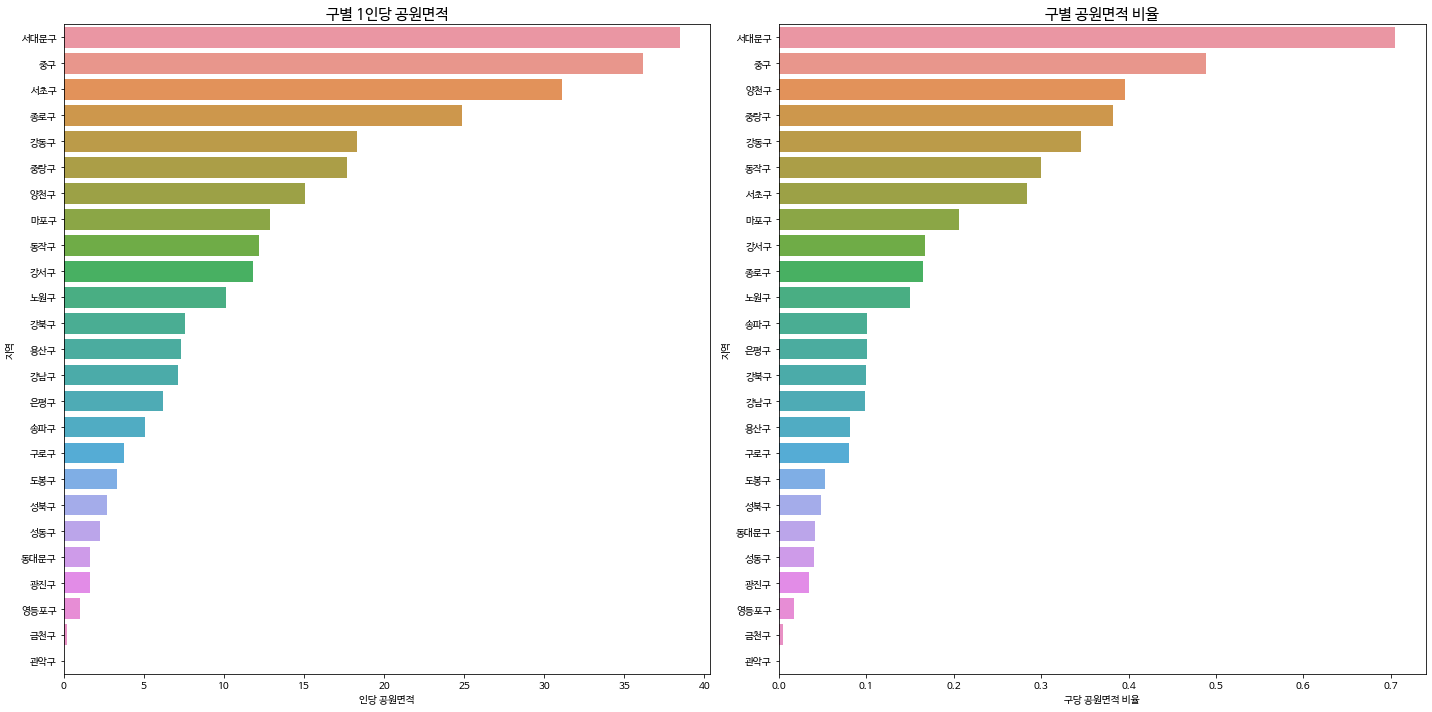

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.barplot(y='지역', x='인당 공원면적', data=merged.sort_values(by='인당 공원면적', ascending=False), ax=ax[0])
sns.barplot(y='지역', x='구당 공원면적 비율', data=merged.sort_values(by='구당 공원면적 비율',ascending=False), ax=ax[1])
ax[0].set_title('구별 1인당 공원면적', fontsize=15)
ax[1].set_title('구별 공원면적 비율', fontsize=15)
plt.tight_layout()
plt.show()

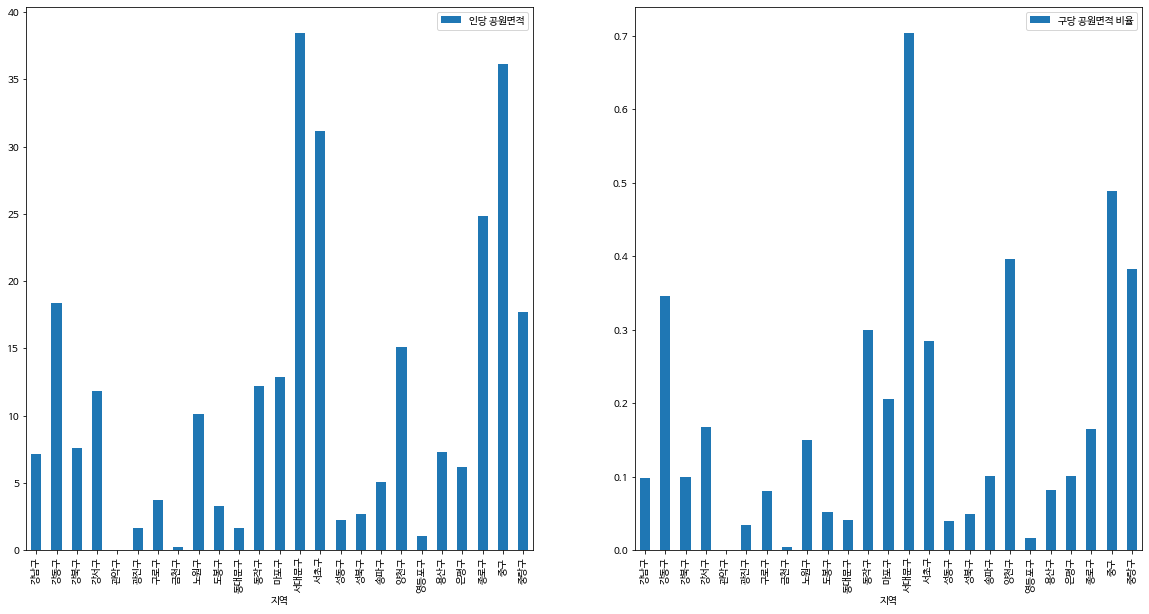

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(20, 10))
merged.plot.bar(x='지역', y='인당 공원면적', ax=ax[0])
merged.plot.bar(x='지역', y='구당 공원면적 비율', ax=ax[1])
plt.show()

In [38]:
merged.to_csv('자치구별 공원 현황.csv', index=False)